## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - http://roycekimmons.com/tools/generated_data/exams
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the Dataset
df=pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some high school,free/reduced,completed,58,73,68
1,male,group D,some high school,standard,none,59,53,55
2,female,group D,associate's degree,standard,none,73,82,83
3,male,group C,associate's degree,free/reduced,completed,61,63,56
4,male,group D,some college,standard,completed,89,84,85


In [4]:
df.shape

(1000, 8)

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [5]:
# Checking Missing Values 
df.isnull().sum()
# You canm also use df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# Checking Duplicates
df[df.duplicated()] # can also use df.duplicated()
# No Duplicate Value Found

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [7]:
# Another way of finding the Duplicated Values
df.duplicated().sum() 

0

In [8]:
# Checking the Columns Data Types
df.info()
# Objects are for the Categorical Data i.e Strings are stored
# int64 denotes to numerical value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Checking the unique values in each of the Columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     75
reading score                  74
writing score                  75
dtype: int64

In [10]:
# Checking the Statistics of the Data
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.521000,69.479000,68.285000
std,15.176623,14.771044,15.452915
min,14.000000,19.000000,16.000000
25%,57.000000,59.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,77.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


## Insights or Observation
- From the above description of numerical data,all means are very close to each other- between 66 and 69
- All the standard deviation are also close- between 14.6- 15.19
- While there is a minimum of 0 for maths,other are having 17 and 10 value

In [11]:
df.tail() # Generating the Last 5 Records 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,some high school,standard,completed,96,87,87
996,female,group C,bachelor's degree,standard,none,96,95,94
997,female,group C,bachelor's degree,standard,none,63,81,76
998,male,group B,bachelor's degree,standard,none,62,60,59
999,male,group B,high school,standard,none,69,66,67


In [12]:
# segregate the numerical and Categorical Data
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O'] # List of String Features

In [13]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype=='int64'] # List of Numerical Feature 

In [14]:
# List of non string Feature 
[feature for feature in df.columns if df[feature].dtype!='O'] 

['math score', 'reading score', 'writing score']

In [15]:
df['gender'].value_counts()

male      509
female    491
Name: gender, dtype: int64

In [16]:
df['race/ethnicity'].value_counts()

group C    310
group D    271
group B    198
group E    156
group A     65
Name: race/ethnicity, dtype: int64

In [17]:
# Aggregate the total score with mean 

df['total score']=(df['math score']+df['reading score']+df['writing score'])
df['average score']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group D,some high school,free/reduced,completed,58,73,68,199,66.333333
1,male,group D,some high school,standard,none,59,53,55,167,55.666667
2,female,group D,associate's degree,standard,none,73,82,83,238,79.333333
3,male,group C,associate's degree,free/reduced,completed,61,63,56,180,60.000000
4,male,group D,some college,standard,completed,89,84,85,258,86.000000


### Exploring More Visualisation

<AxesSubplot: xlabel='average score', ylabel='Count'>

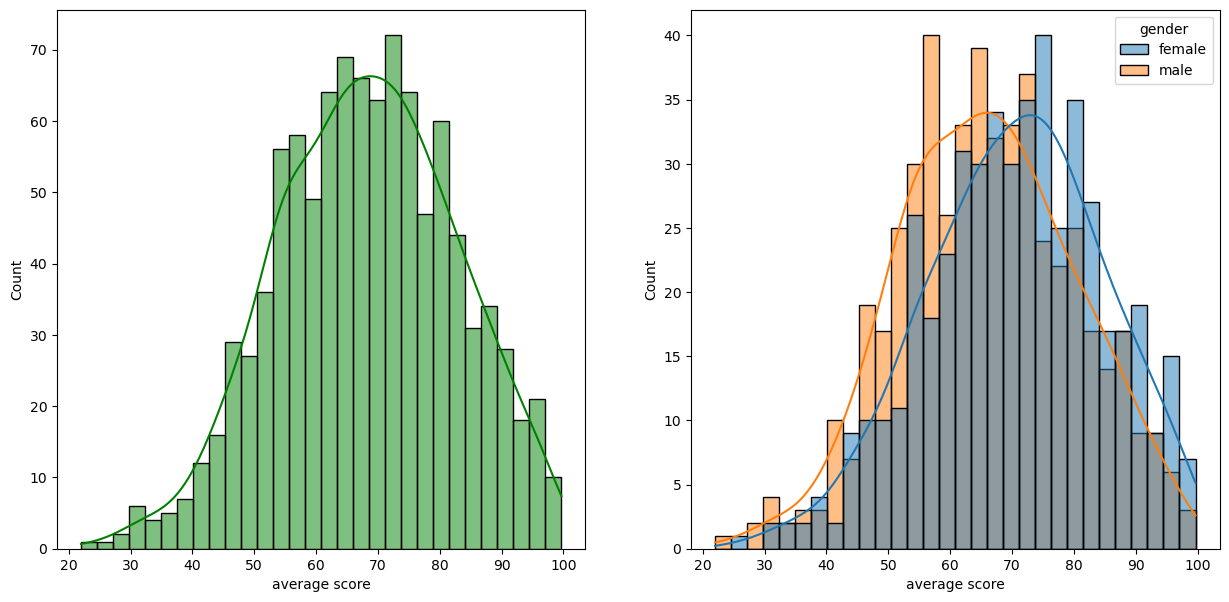

In [18]:
# Histogram of the average score
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121) # For first Histogram
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')

# Histogram of the average score of males and females individually
plt.subplot(122) # for 2nd hiastogram 
sns.histplot(data=df,x='average score',bins=30,kde=True,hue='gender')

## Insights
Female students are performing better than the Male Students

<AxesSubplot: xlabel='average score', ylabel='Count'>

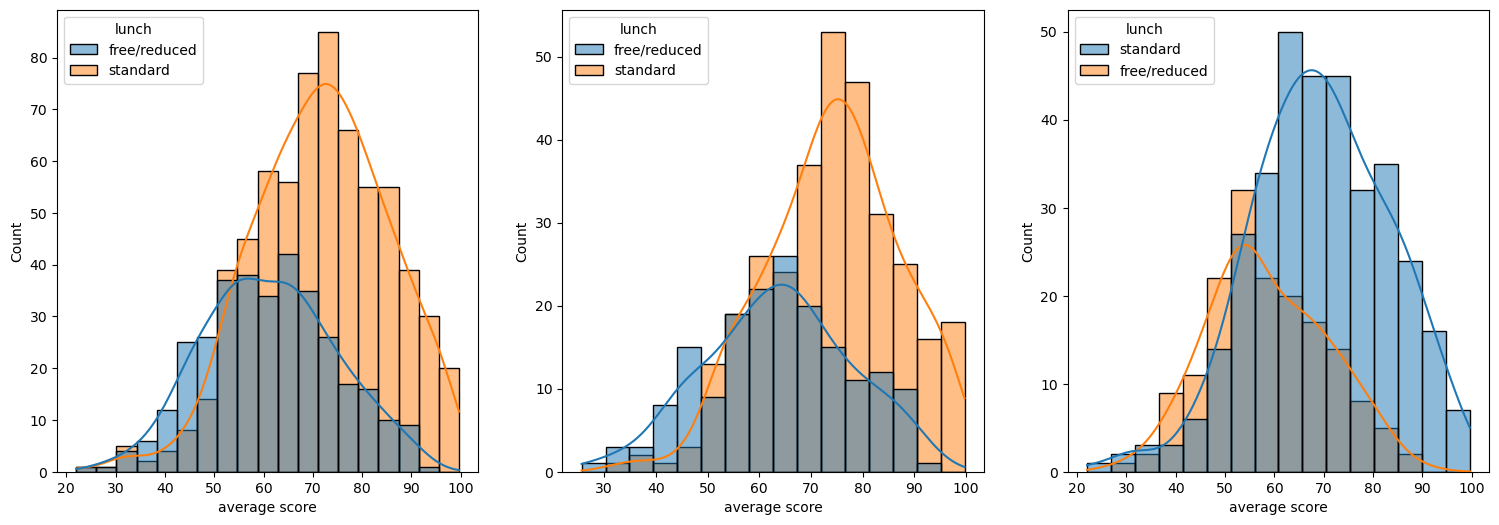

In [19]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141) # for 1st histogram 
sns.histplot(data=df,x='average score',kde=True,hue='lunch')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')

### Insights
- Standard Lunch helps the students to perform well in the exams
- standard lunch helps perform well in the exams be it a male or female

<AxesSubplot: xlabel='average score', ylabel='Count'>

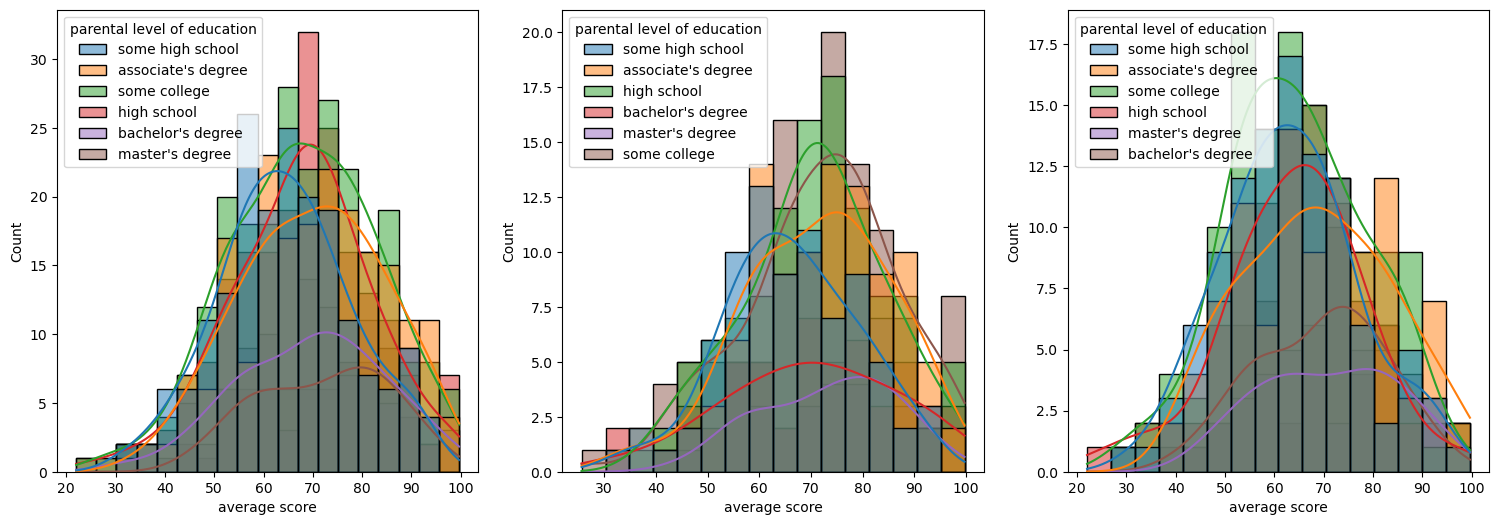

In [20]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141) # for 1st histogram 
sns.histplot(data=df,x='average score',kde=True,hue='parental level of education')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental level of education')

#####  Insights
- In general parent's education don't help student perform well in exam.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 2nd plot we can see there is no effect of parent's education on female students.

<AxesSubplot: xlabel='average score', ylabel='Count'>

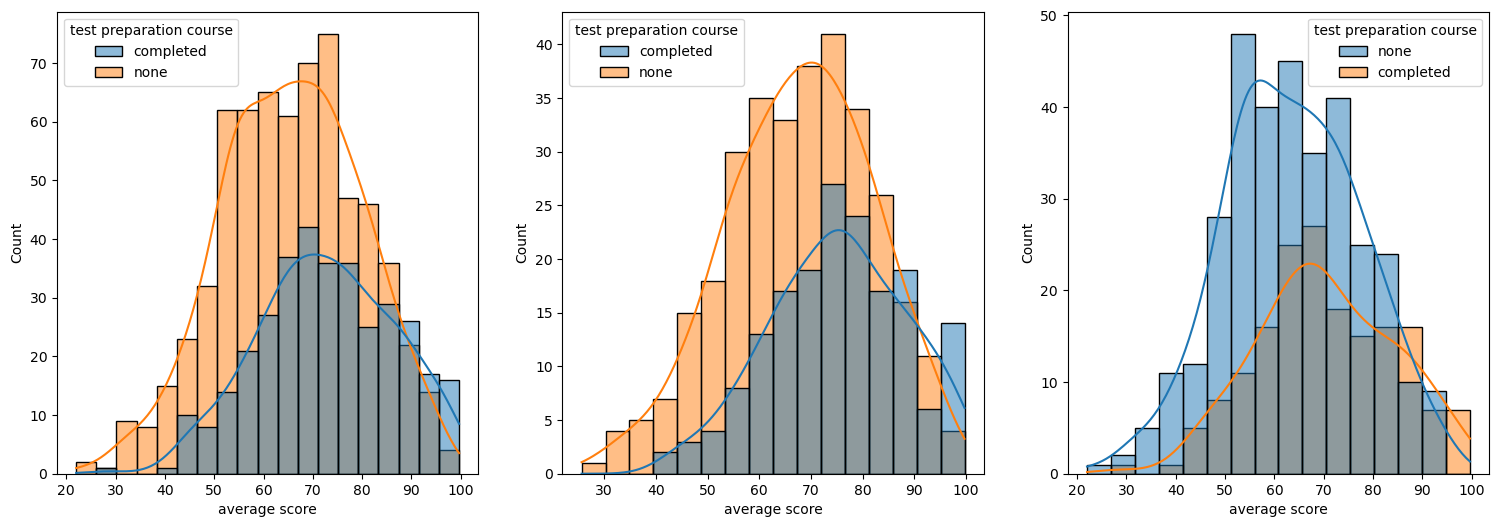

In [21]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141) # for 1st histogram 
sns.histplot(data=df,x='average score',kde=True,hue='test preparation course')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='test preparation course')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='test preparation course')

<AxesSubplot: xlabel='average score', ylabel='Count'>

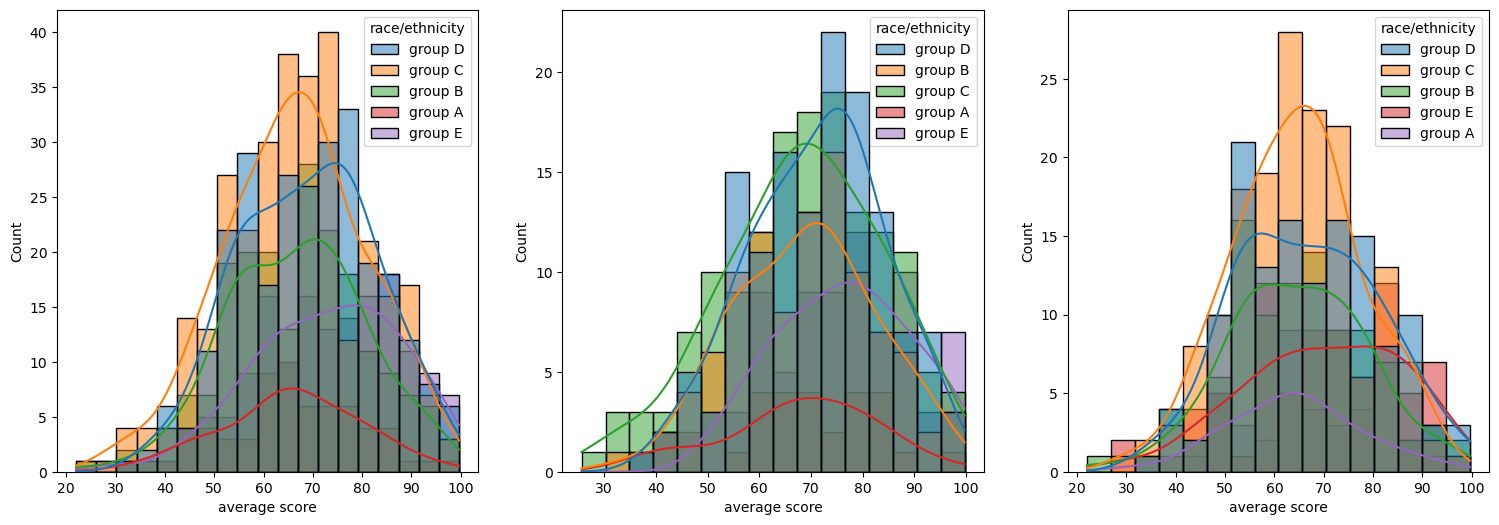

In [22]:
fig,axis=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141) # for 1st histogram 
sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race/ethnicity')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race/ethnicity')

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<AxesSubplot: >

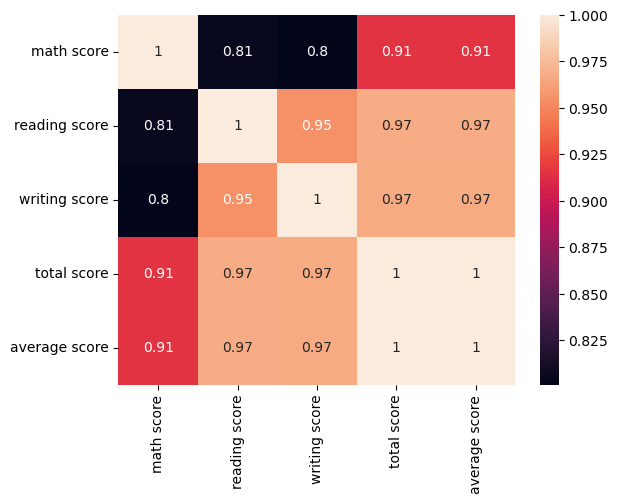

In [23]:
sns.heatmap(df.corr(),annot=True)